In [62]:
import pandas as pd
import numpy as np

In [63]:
df_train=pd.read_csv("Titanic_train.csv")

In [64]:
df_test=pd.read_csv("titanic_train.csv")

In [65]:
df_train.shape

(891, 12)

In [66]:
df_test.shape

(891, 12)

In [67]:
df_train["code"]=1
df_test["code"]=2

In [68]:
data=pd.concat([df_train,df_test])

In [69]:
data.shape

(1782, 13)

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [71]:
data["code"].value_counts()

code
1    891
2    891
Name: count, dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   int64  
 1   Survived     1782 non-null   int64  
 2   Pclass       1782 non-null   int64  
 3   Name         1782 non-null   object 
 4   Sex          1782 non-null   object 
 5   Age          1428 non-null   float64
 6   SibSp        1782 non-null   int64  
 7   Parch        1782 non-null   int64  
 8   Ticket       1782 non-null   object 
 9   Fare         1782 non-null   float64
 10  Cabin        408 non-null    object 
 11  Embarked     1778 non-null   object 
 12  code         1782 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 194.9+ KB


In [73]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1782.000000,1782.000000,1782.000000,1428.000000,1782.000000,1782.000000,1782.000000,1782.00000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.50000
std,257.281582,0.486456,0.835836,14.521407,1.102434,0.805831,49.679476,0.50014
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.00000
25%,223.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.903100,1.00000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.50000
75%,668.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.00000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.00000


In [74]:
data["Age"].isna().sum()/len(data["Age"])*100

19.865319865319865

In [75]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Fare'].fillna(data['Fare'].median(),inplace=True)
data["Cabin"].isna().sum()/len(data["Cabin"])*100

C:\Users\User\AppData\Local\Temp\ipykernel_13772\641815792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13772\641815792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

77.10437710437711

In [76]:
#dropping Cabin column because it has 77% of blank values
data.drop('Cabin',axis=1,inplace=True)

In [77]:
data.shape

(1782, 12)

In [78]:
new_data=data[(data["Embarked"]=="S")|(data["Embarked"]=="C")|(data["Embarked"]=="Q")]

In [79]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1778 non-null   int64  
 1   Survived     1778 non-null   int64  
 2   Pclass       1778 non-null   int64  
 3   Name         1778 non-null   object 
 4   Sex          1778 non-null   object 
 5   Age          1778 non-null   float64
 6   SibSp        1778 non-null   int64  
 7   Parch        1778 non-null   int64  
 8   Ticket       1778 non-null   object 
 9   Fare         1778 non-null   float64
 10  Embarked     1778 non-null   object 
 11  code         1778 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 180.6+ KB


In [80]:
import matplotlib.pyplot as plt
import seaborn as sn

In [81]:
numerical_features=new_data.select_dtypes(include=['int','float']).columns

In [82]:
numerical_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'code'],
      dtype='object')

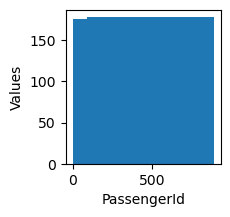

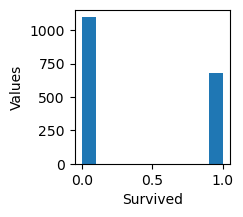

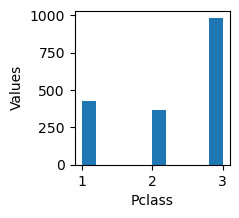

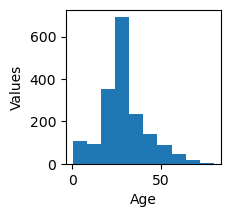

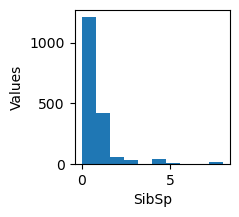

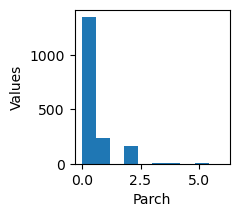

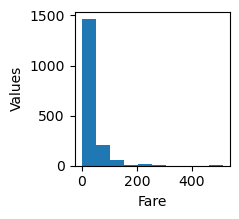

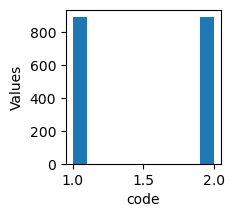

In [83]:
#creating Visualizations
for cols in numerical_features:
    plt.figure(figsize=(2,2))
    plt.hist(new_data[cols])
    plt.xlabel(cols)
    plt.ylabel("Values")
    plt.show()

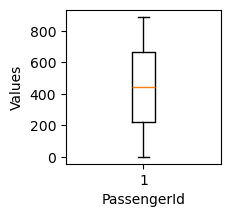

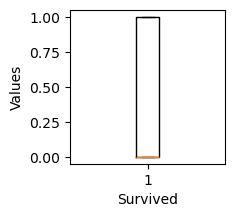

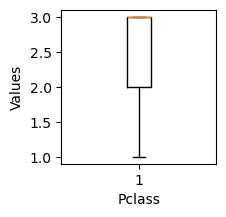

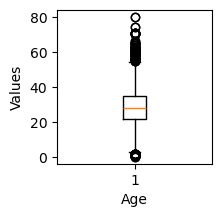

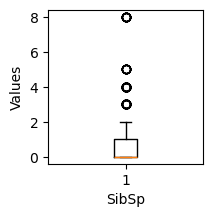

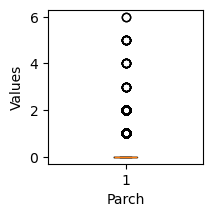

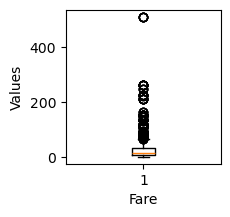

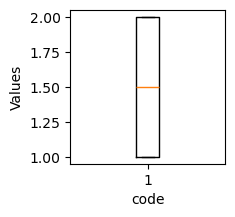

In [84]:
for cols in numerical_features:
    plt.figure(figsize=(2,2))
    plt.boxplot(new_data[cols])
    plt.xlabel(cols)
    plt.ylabel("Values")
    plt.show()

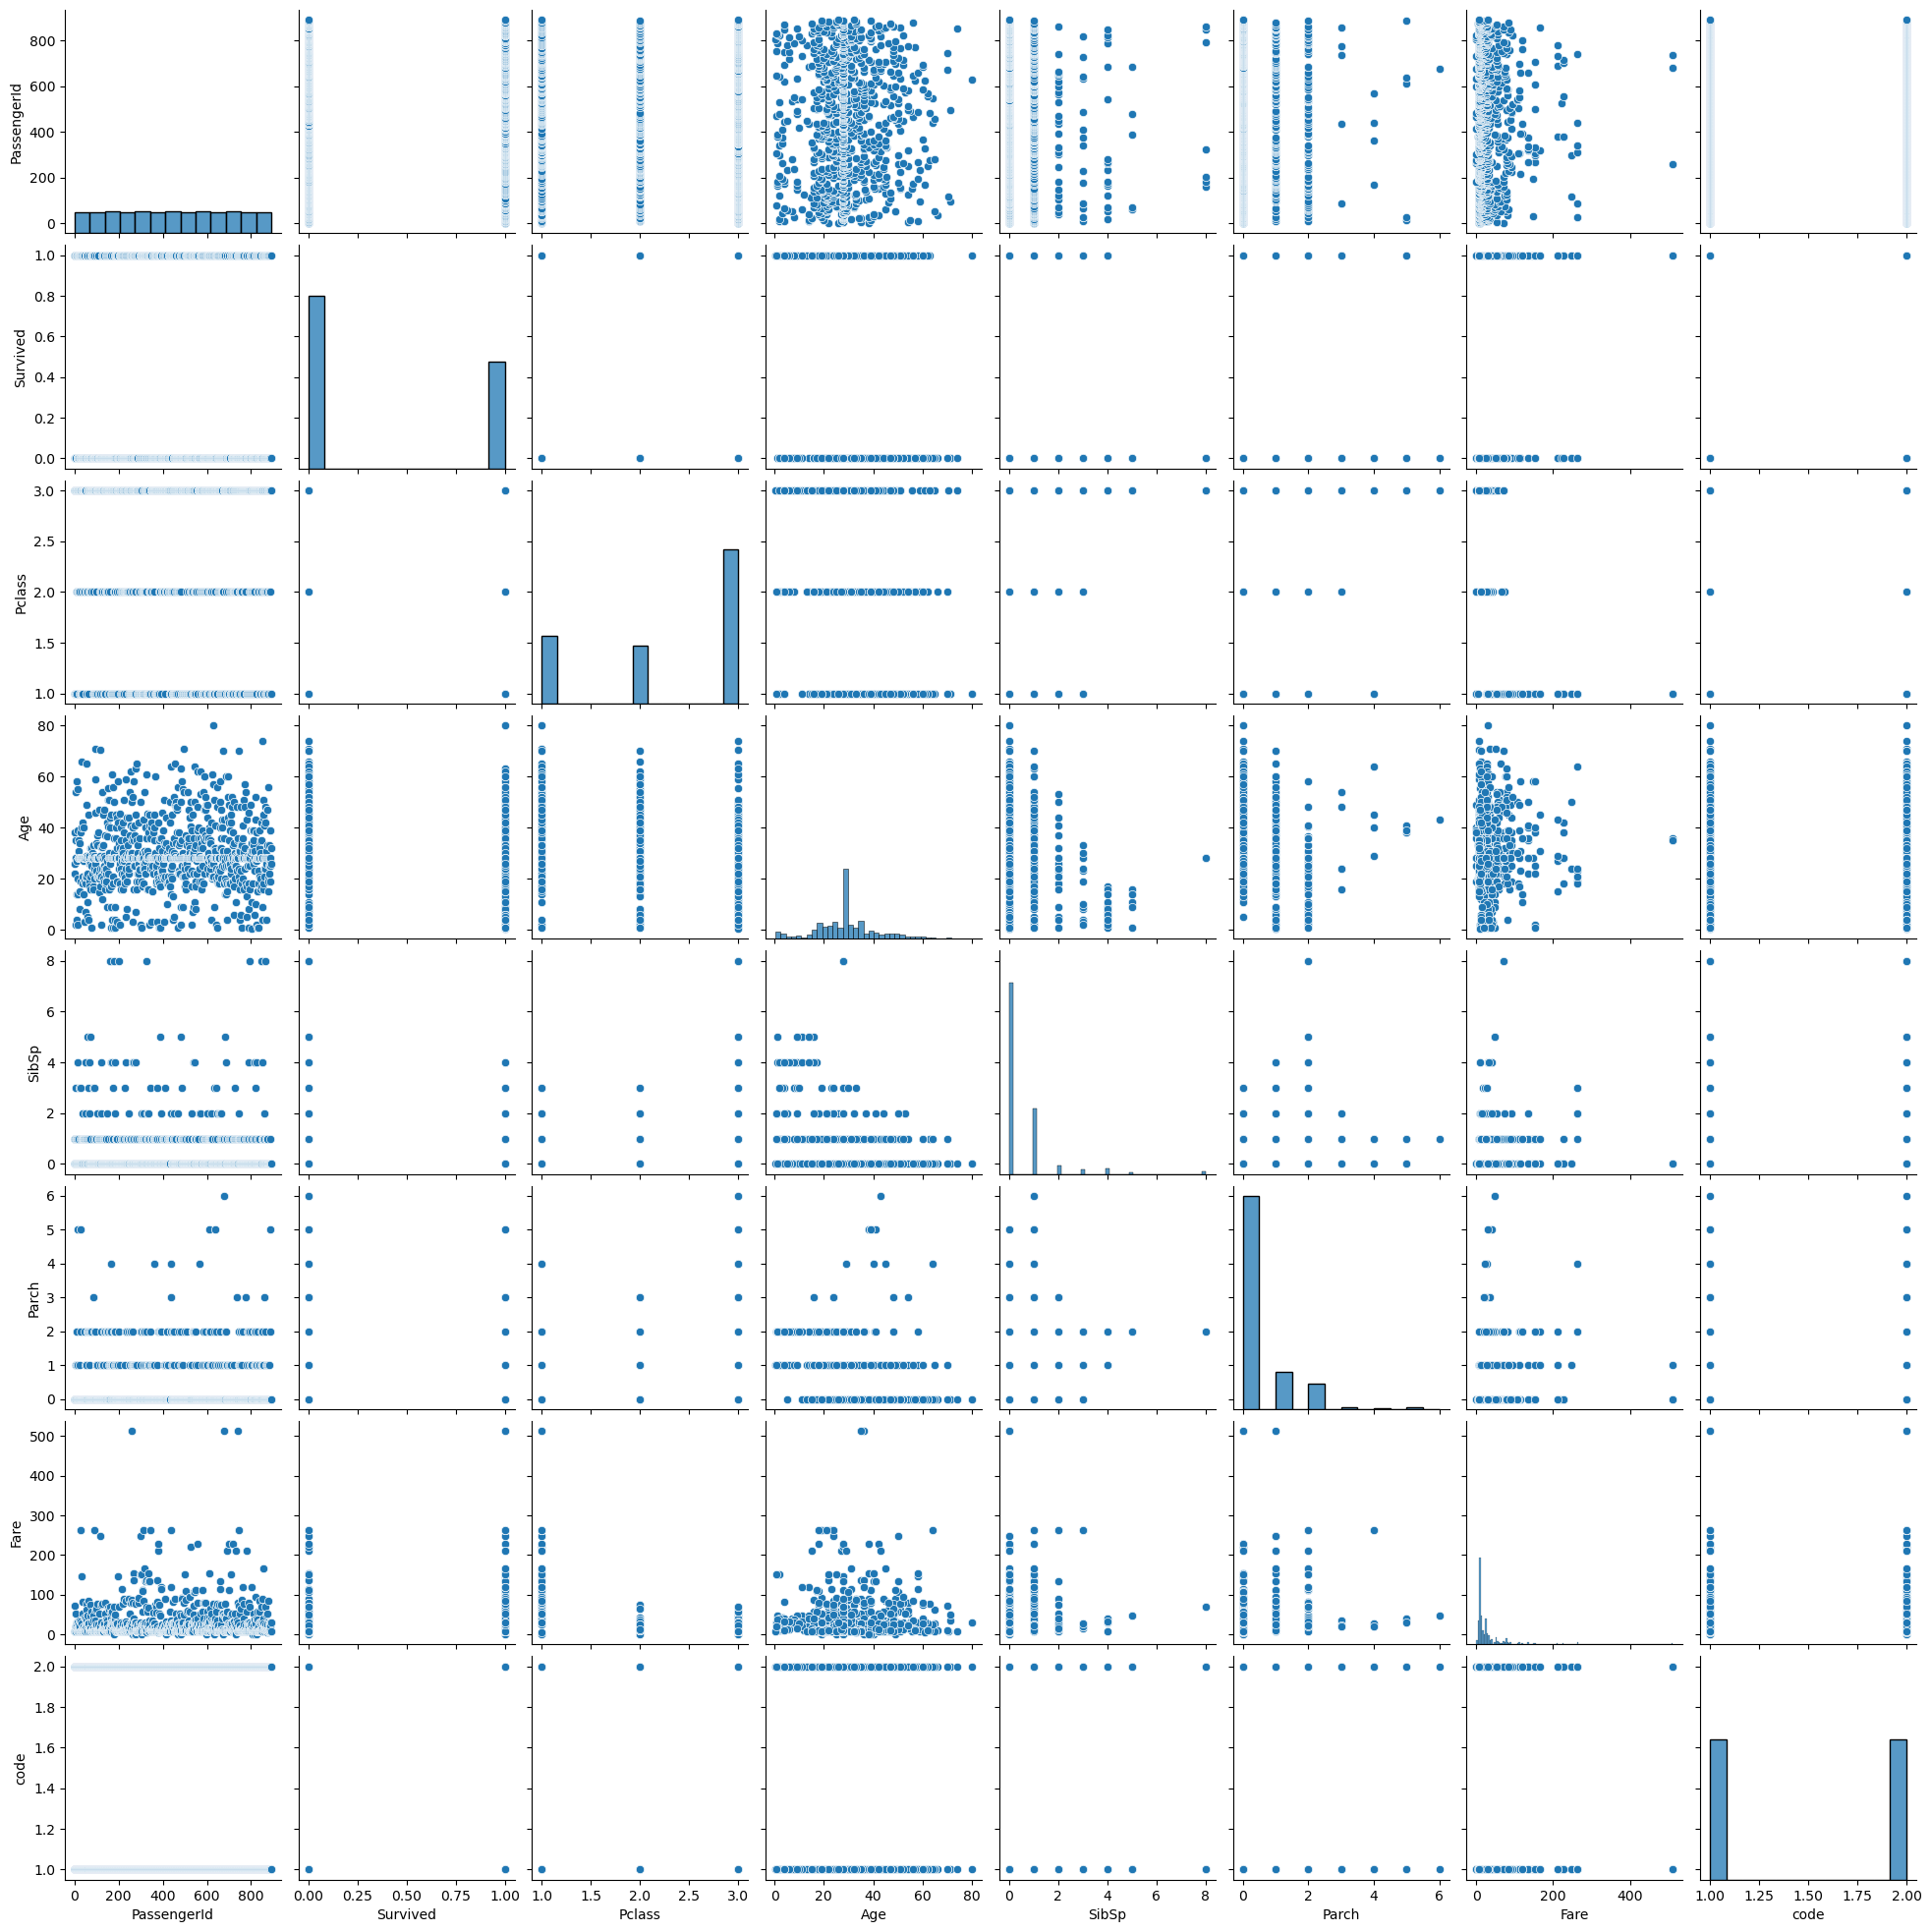

In [85]:
import seaborn as sn
sn.pairplot(new_data)

In [88]:
#Analyze Correlations 
correlation_matrix=new_data[numerical_features].corr()

In [99]:
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
PassengerId,1.000000e+00,-5.028320e-03,-3.532985e-02,3.131855e-02,-5.768590e-02,-1.656579e-03,1.270324e-02,2.324467e-15
Survived,-5.028320e-03,1.000000e+00,-3.355489e-01,-6.982171e-02,-3.404000e-02,8.315078e-02,2.552905e-01,-3.795466e-16
Pclass,-3.532985e-02,-3.355489e-01,1.000000e+00,-3.365122e-01,8.165562e-02,1.682449e-02,-5.481933e-01,2.241163e-15
Age,3.131855e-02,-6.982171e-02,-3.365122e-01,1.000000e+00,-2.325434e-01,-1.714851e-01,9.370714e-02,-4.794786e-16
SibSp,-5.768590e-02,-3.404000e-02,8.165562e-02,-2.325434e-01,1.000000e+00,4.145416e-01,1.608869e-01,-7.517406e-16
Parch,-1.656579e-03,8.315078e-02,1.682449e-02,-1.714851e-01,4.145416e-01,1.000000e+00,2.175320e-01,4.977990e-16
Fare,1.270324e-02,2.552905e-01,-5.481933e-01,9.370714e-02,1.608869e-01,2.175320e-01,1.000000e+00,4.418341e-16
code,2.324467e-15,-3.795466e-16,2.241163e-15,-4.794786e-16,-7.517406e-16,4.977990e-16,4.418341e-16,1.000000e+00


<Axes: >

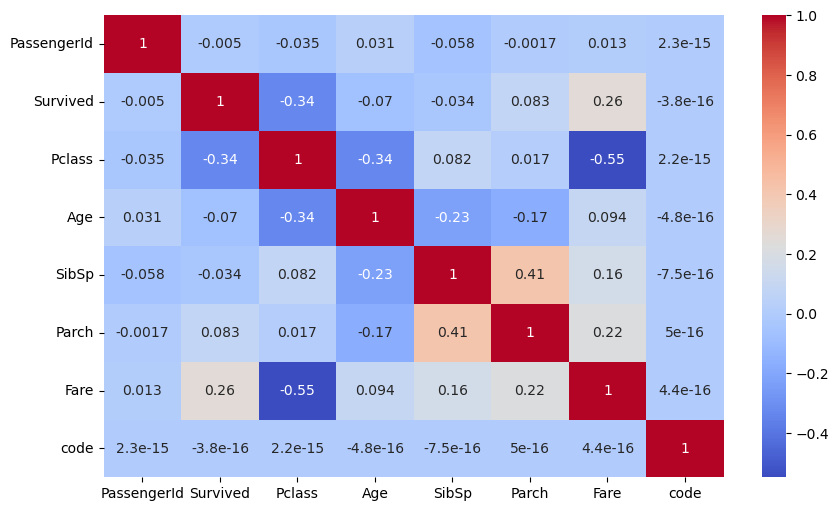

In [102]:
plt.figure(figsize=(10,6))
sn.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

<Axes: xlabel='Survived', ylabel='count'>

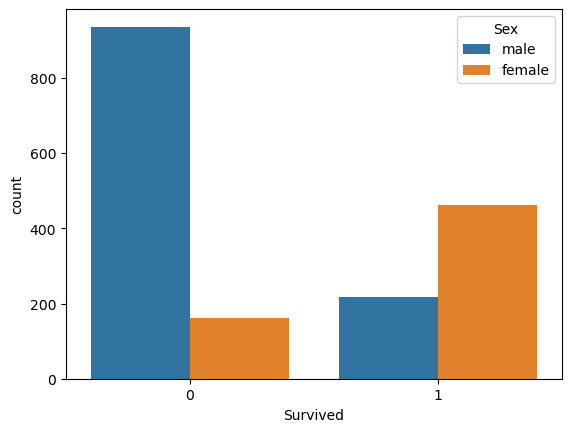

In [122]:
#countplot of survived vs not survived
sn.countplot(x="Survived",data=new_data,hue="Sex")

In [123]:
new_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
code           0
dtype: int64

In [125]:
categorical_data=new_data.select_dtypes(include=[object]).columns

In [127]:
categorical_data

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [128]:
new_data['Sex'].value_counts()

Sex
male      1154
female     624
Name: count, dtype: int64

In [129]:
gender=pd.get_dummies(new_data["Sex"],drop_first=True)
gender=gender.astype(int)

In [130]:
new_data["Gender"]=gender

C:\Users\User\AppData\Local\Temp\ipykernel_13772\3802441420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Gender"]=gender


In [131]:
new_data.drop(new_data.columns[[3,4,8,10]],axis=1,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13772\2592427840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(new_data.columns[[3,4,8,10]],axis=1,inplace=True)


In [36]:
new_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,1,0,3,22.0,1,0,7.2500,1,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,2,1
887,888,1,1,19.0,0,0,30.0000,2,0
888,889,0,3,28.0,1,2,23.4500,2,0
889,890,1,1,26.0,0,0,30.0000,2,1


In [144]:
new_data.ndim

2

In [152]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
new_data[["Age"]]=SS.fit_transform(new_data[["Age"]])
new_data[["SibSp"]]=SS.fit_transform(new_data[["SibSp"]])
new_data[["Fare"]]=SS.fit_transform(new_data[["Fare"]])
new_data[["Parch"]]=SS.fit_transform(new_data[["Parch"]])

C:\Users\User\AppData\Local\Temp\ipykernel_13772\2341893594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[["Age"]]=SS.fit_transform(new_data[["Age"]])
C:\Users\User\AppData\Local\Temp\ipykernel_13772\2341893594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[["SibSp"]]=SS.fit_transform(new_data[["SibSp"]])
C:\Users\User\AppData\Local\Temp\ipykernel_13772\2341893594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [154]:
new_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,1,0,3,-0.563674,0.431350,-0.474326,-0.500240,1,1
1,2,1,1,0.669217,0.431350,-0.474326,0.788947,1,0
2,3,1,3,-0.255451,-0.475199,-0.474326,-0.486650,1,0
3,4,1,1,0.438050,0.431350,-0.474326,0.422861,1,0
4,5,0,3,0.438050,-0.475199,-0.474326,-0.484133,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.178396,-0.475199,-0.474326,-0.384475,2,1
887,888,1,1,-0.794841,-0.475199,-0.474326,-0.042213,2,0
888,889,0,3,-0.101340,0.431350,2.006119,-0.174084,2,0
889,890,1,1,-0.255451,-0.475199,-0.474326,-0.042213,2,1


In [162]:
df_new_train=new_data[new_data['code']==1]

In [164]:
df_new_test=new_data[new_data['code']==2]

In [166]:
df_new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,1,0,3,-0.563674,0.431350,-0.474326,-0.500240,1,1
1,2,1,1,0.669217,0.431350,-0.474326,0.788947,1,0
2,3,1,3,-0.255451,-0.475199,-0.474326,-0.486650,1,0
3,4,1,1,0.438050,0.431350,-0.474326,0.422861,1,0
4,5,0,3,0.438050,-0.475199,-0.474326,-0.484133,1,1


In [168]:
df_new_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,1,0,3,-0.563674,0.431350,-0.474326,-0.500240,2,1
1,2,1,1,0.669217,0.431350,-0.474326,0.788947,2,0
2,3,1,3,-0.255451,-0.475199,-0.474326,-0.486650,2,0
3,4,1,1,0.438050,0.431350,-0.474326,0.422861,2,0
4,5,0,3,0.438050,-0.475199,-0.474326,-0.484133,2,1


In [174]:
df_new_test.shape

(889, 9)

In [176]:
df_new_train.shape

(889, 9)

In [180]:
x_train=df_new_train[["Age",'SibSp','Parch','Fare','Gender','Pclass']]
y_train=df_new_train["Survived"]

In [182]:
x_test=df_new_test[["Age",'SibSp','Parch','Fare','Gender','Pclass']]
y_test=df_new_test["Survived"]

In [184]:
#Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [186]:
lr.fit(x_train,y_train)

LogisticRegression()

In [188]:
lr.coef_

array([[-0.49772196, -0.36814613, -0.07642705,  0.14638232, -2.64264947,
        -1.04823733]])

In [204]:
y_train_pred=lr.predict(x_train)
y_train_pred
y_test_pred=lr.predict(x_test)

In [242]:
#Model Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [244]:
accuracy=accuracy_score(y_test,y_test_pred)
precision_score=precision_score(y_test,y_test_pred)
recall_score=recall_score(y_test,y_test_pred)
f1_score=f1_score(y_test,y_test_pred)

In [246]:
results=pd.DataFrame([["LogisticRegression (Lasso)",accuracy,precision_score,recall_score,f1_score]],columns=[["Model","Accuracy","Precision","Recall","f1_score"]])

In [248]:
results

,Model,Accuracy,Precision,Recall,f1_score
0,LogisticRegression (Lasso),0.795276,0.743827,0.708824,0.725904


In [257]:
df_new_test["Y_proba"]=lr.predict_proba(x_test)[:,1]
print(df_new_test["Y_proba"])

0      0.099016
1      0.891484
2      0.649482
3      0.897289
4      0.085435
         ...   
886    0.268736
887    0.954643
888    0.515619
889    0.533860
890    0.094789
Name: Y_proba, Length: 889, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_13772\2591596184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_test["Y_proba"]=lr.predict_proba(x_test)[:,1]


AUC_Curve 0.854


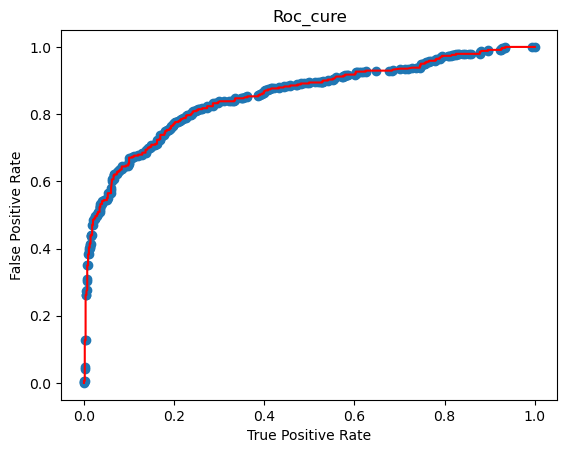

In [269]:
fpr,tpr,dummy=roc_curve(y_test,df_new_test["Y_proba"])
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('Roc_cure')
print("AUC_Curve",roc_auc_score(y_test,df_new_test["Y_proba"]).round(3))

#1. What is the difference between precision and recall?


Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In other words, it measures the accuracy of the positive predictions. It is calculated as:

Precision=True Positives/True Positives+False Positives


Recall: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. It measures the model's ability to find all the relevant cases within the data. It is calculated as:

Recall=True Positives/True Positives+False Negatives

#Recall is important in cases where the cost of false negatives is high, and you want to minimize false negatives.

#2. What is cross-validation, and why is it important in binary classification?


Cross-validation is a technique used to assess the performance of machine learning models by splitting the dataset into
multiple subsets (folds) and training the model on different combinations of these subsets.
It helps to evaluate the model's performance in a more robust way compared to a single train-test split.

#cross-validation is an essential technique in binary classification for obtaining reliable performance estimates,
reducing overfitting, and optimizing model hyperparameters.
